In [3]:
import os
import os.path as osp
import numpy as np
import wandb
from pathlib import Path

from PIL import Image, ImageDraw
import json

In [56]:
WANDB_PROJECT = 'fashion-retrieval'
ENTITY = None

DEEP_FASHION_DIR = osp.join(osp.expanduser('~'), 'Documents', 'dev', 'DeepFashion')
DEEP_FASHION_CLOTHING_ANNOS_DIR = osp.join(DEEP_FASHION_DIR, 'Anno_coarse')
DEEP_FASHION_CLOTHING_CATEGORIES_PATH = osp.join(DEEP_FASHION_CLOTHING_ANNOS_DIR, 'list_category_cloth.txt')
DEEP_FASHION_CLOTHING_ATTRIBUTES_PATH = osp.join(DEEP_FASHION_CLOTHING_ANNOS_DIR, 'list_attr_cloth.txt')

CLASS_LABELS = []
ATTR_LABELS = []
CATEGORY_TYPES = {
    1: 'upper-body',
    2: 'lower-body',
    3: 'full-body'
}

# 1. In attribute type, "1" represents texture-related attributes, "2" represents fabric-related attributes, "3" represents shape-related attributes, "4" represents part-related attributes, "5" represents style-related attributes;
# 2. The order of attribute labels accords with the order of attribute names;
# 3. In attribute labels, "1" represents positive while "-1" represents negative, '0' represents unknown;
# 4. Attribute prediction is treated as a multi-label tagging problem.

ATTRIBUTE_TYPES = {
    1: 'texture',
    2: 'fabric',
    3: 'shape',
    4: 'part',
    5: 'style'
}

with open(DEEP_FASHION_CLOTHING_CATEGORIES_PATH, 'r') as f:
    for idx, line in enumerate(f):
        if idx > 1:
            CLASS_LABELS.append(line.split()[0])
            
with open(DEEP_FASHION_CLOTHING_ATTRIBUTES_PATH, 'r') as f:
    for idx, line in enumerate(f):
        if idx > 1:
            ATTR_LABELS.append(' '.join(l for l in line.split() if l.replace('-', '').isalpha()))
            
IDX_TO_CLASS = {idx + 1:c for idx, c in enumerate(CLASS_LABELS)}
CLS_TO_IDX = {v: k for k, v in IDX_TO_CLASS.items()}

1000

In [55]:
def create_mask(img_shape, segmentation_map_list, category):
    mask = np.zeros(img_shape[1]*img_shape[0], dtype=int)
    return mask

def get_polygon_regions(segm_mask):
    return [[pair for pair in zip(region[::2], region[1::2])] for region in segm_mask]

In [6]:
DEEP_FASHION_TRAIN_DIR = os.path.join(DEEP_FASHION_DIR, 'train')
DEEP_FASHION_VALIDATION_DIR = os.path.join(DEEP_FASHION_DIR, 'validation')
DEEP_FASHION_TEST_DIR = os.path.join(DEEP_FASHION_DIR, 'test')

In [7]:
train_annos = sorted(os.listdir(Path(DEEP_FASHION_TRAIN_DIR) / 'annos'))
train_images = sorted(os.listdir(Path(DEEP_FASHION_TRAIN_DIR) / 'image'))

In [8]:
train_annos_paths = list(map(lambda x: os.path.join(DEEP_FASHION_TRAIN_DIR, 'annos', x), train_annos))
train_images_paths = list(map(lambda x: os.path.join(DEEP_FASHION_TRAIN_DIR, 'image', x), train_images))

In [9]:
with open(train_annos_paths[0], 'r') as f:
    data = json.load(f)

In [46]:
# These points define a polygon
segm = data['item1']['segmentation']

In [31]:
x, y = 257, 35
nn[y*w + x]

16637

In [32]:
nn.reshape(h, w)[35, 257]

16637

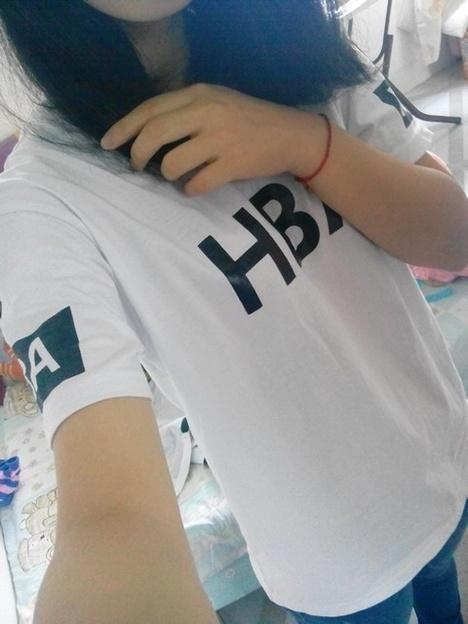

In [61]:
img = Image.open(train_images_paths[0]).convert('RGB')

In [57]:
polys = get_polygon_regions(segm)

In [62]:
for poly in polys:
    ImageDraw.Draw(img).polygon(poly, outline=1, fill=1)

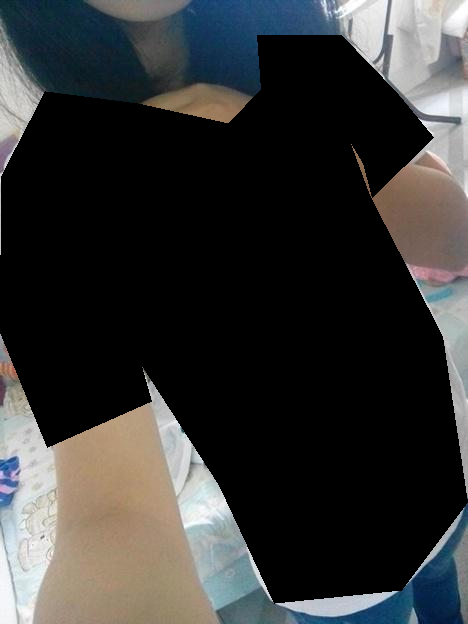

In [63]:
img